In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import datetime
from pathlib import Path

DATA_FOLDER = Path('zb-library-data/')

In [2]:
s = pd.Series(sorted(DATA_FOLDER.glob('????????.txt')))
df = pd.DataFrame()

df['stem'] = s.apply(lambda r: r.stem)
df['size [kB]'] = s.apply(lambda r: f'{r.stat().st_size / 1000:.2f}')
df.index = s

print(df.to_markdown())

|                              |     stem |   size [kB] |
|:-----------------------------|---------:|------------:|
| zb-library-data/20201005.txt | 20201005 |       47.31 |
| zb-library-data/20201006.txt | 20201006 |      251.51 |
| zb-library-data/20201007.txt | 20201007 |      242.85 |
| zb-library-data/20201016.txt | 20201016 |        0.41 |
| zb-library-data/20201017.txt | 20201017 |       15.5  |
| zb-library-data/20201018.txt | 20201018 |        9.17 |


In [3]:
dates = []
for file in sorted(DATA_FOLDER.glob('????????.txt')):
    volumes = pd.read_csv(
        file,
        index_col="datetime",
    )
    volumes.index = pd.to_datetime(volumes.index).time

    date = datetime.datetime.strptime(file.stem, "%Y%m%d")

    dates.append(tuple([date, volumes]))

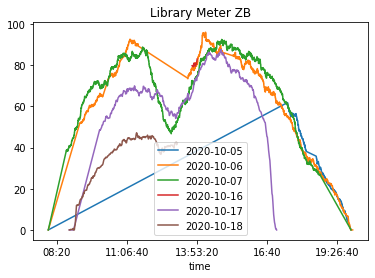

In [4]:
plt.title('Library Meter ZB')

legend = []
for date, volumes in dates:
    legend.append(date.strftime('%Y-%m-%d'))
    volumes['volume'].plot()

plt.legend(legend)
plt.savefig('docs/plot.png')